<a href="https://colab.research.google.com/github/GeorgeKarlinzer/BAWiM/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn

## Informacje ogólne
Biblioteka do machine learningu napisana w Pythonie i CPythonie

Cechy:
- bazuje w dużej mierze na bibliotece NumPy (oraz na Matplotlib, Pandas, SciPy)
- posiada dokumentację z wieloma przykładami (https://scikit-learn.org)
- stosunkowo prosta do użycia i przyjazna dla początkujących
- open-source, v1.0 wyszła we wrześniu 2021 r.


## Przykłady implementacji


### Regresja (Regularyzacja) - Ridge Regression (Regularyzacja Tichonowa)

Regresja pozwala na określenie współzmienności kilku zmiennych przez dopasowanie do nich funkcji, dzięki czemu możliwa jest predykcja nieznanych wartości na podstawie wartości wcześniej przeanalizowanych.

Regularyzacja jest modyfikacją procesu uczenia, która ma na celu zmniejszenie błędu generalizacji w algorytmie regresji.

Scikit-learn oferuje gotową implementację najczęściej używanych metod regularyzacji:
- Regularyzacja L1 - regresja z LASSO (sklearn.linear_model.Lasso)
- Regularyzacja L2 - ridge regression (sklearn.linear_model.Ridge)

Przykład ukazuje użycie regularyzacji L2 (Ridge regression) ze zmieniającymi się współczynnikami regularyzacji przy użyciu obiektu Ridge na losowo wygenerowanym zbiorze danych.

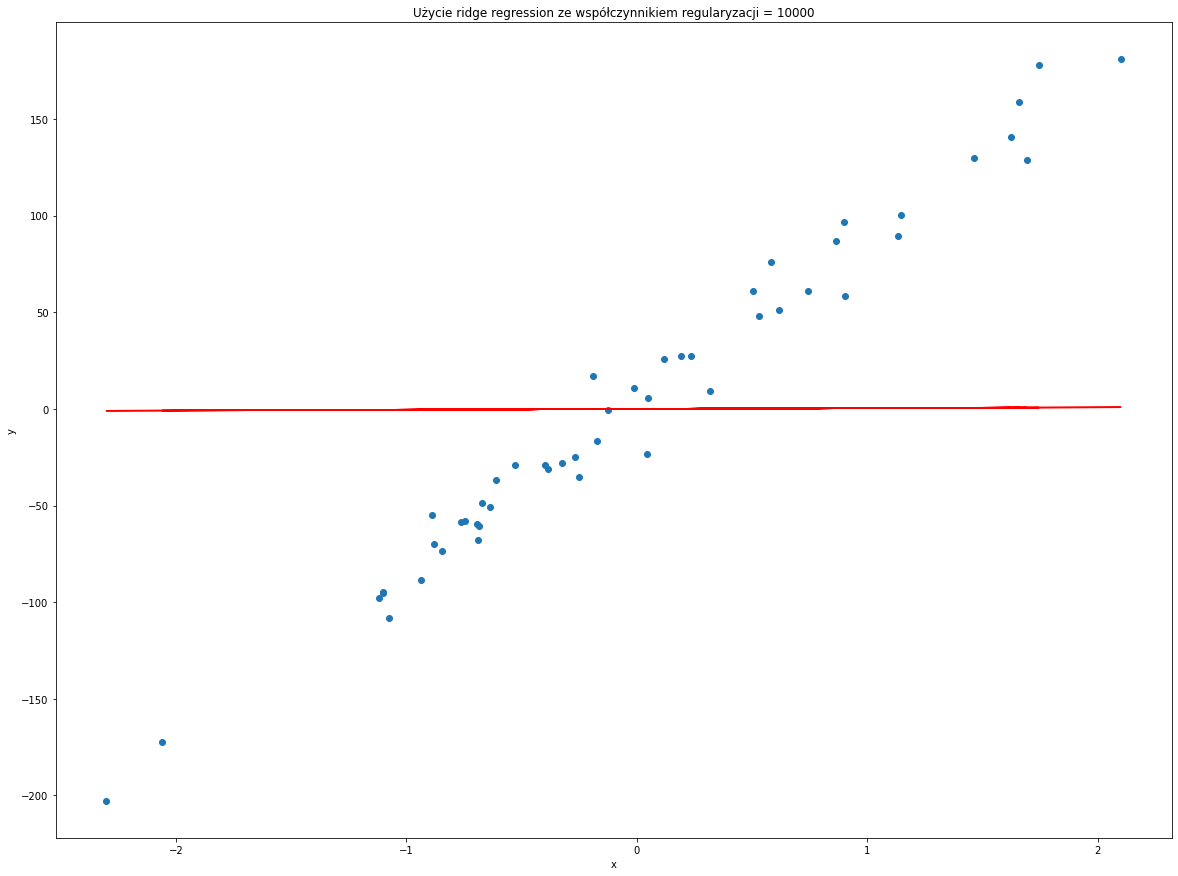

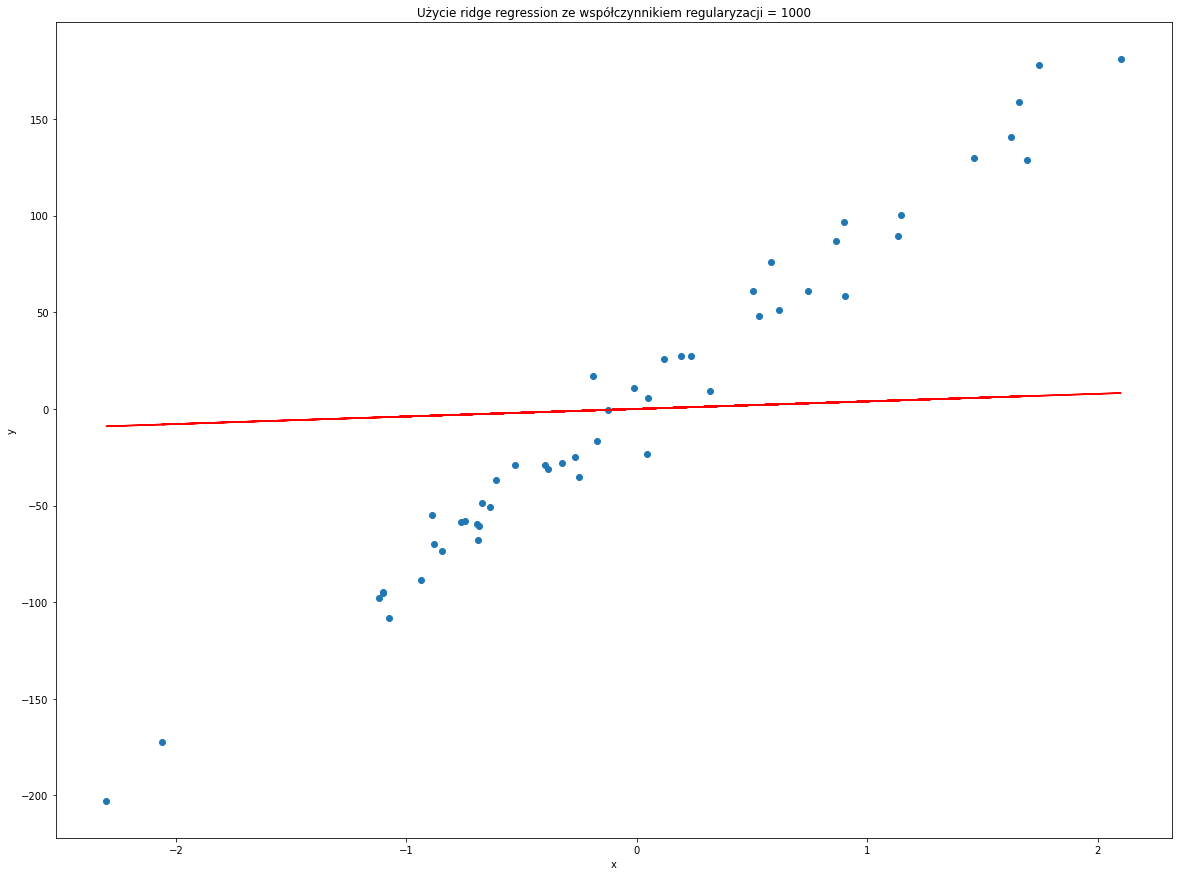

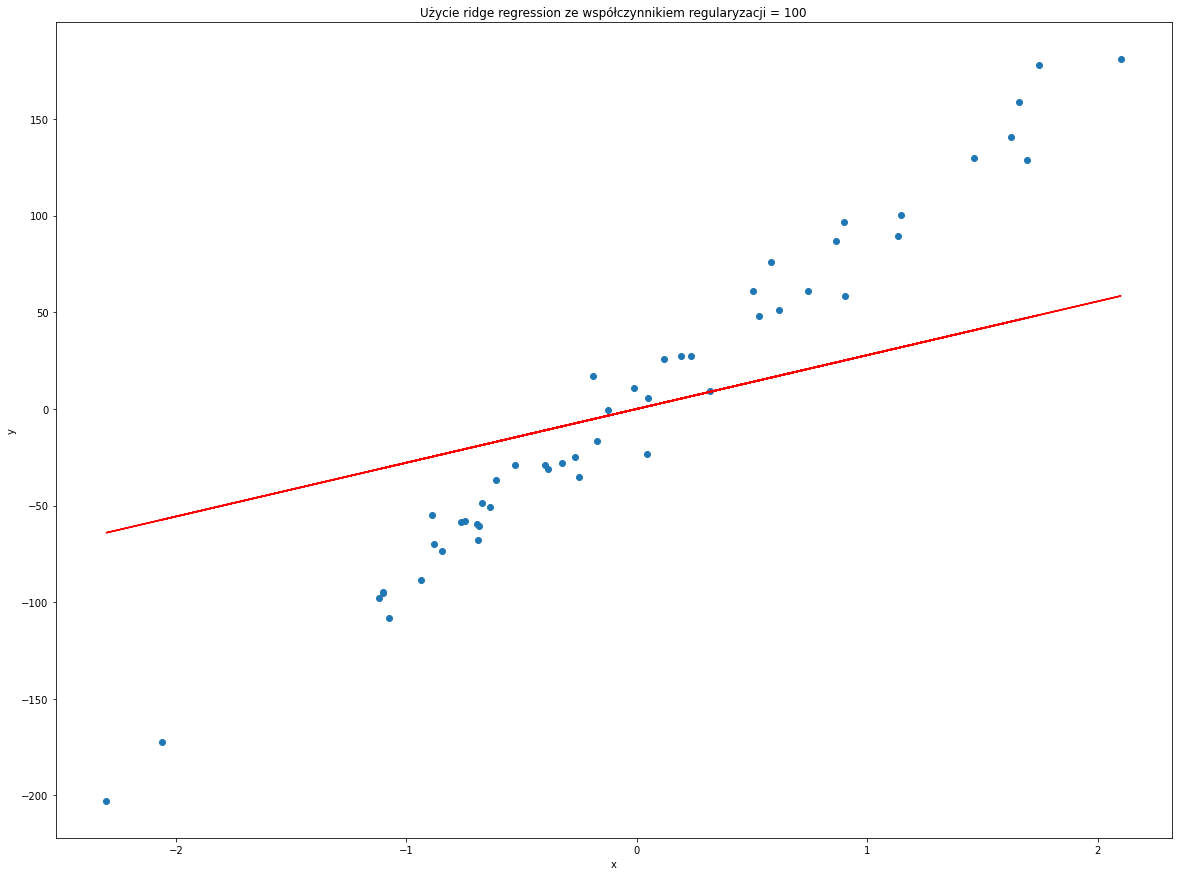

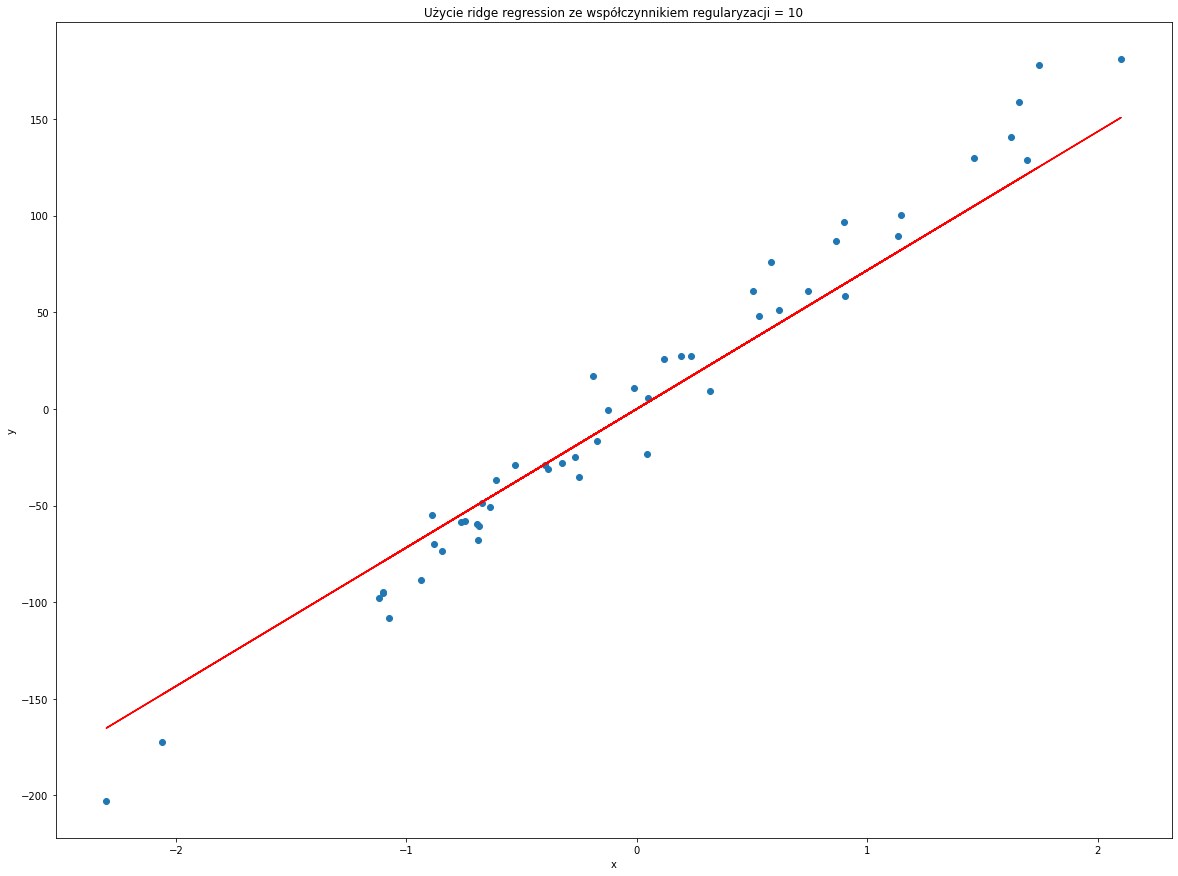

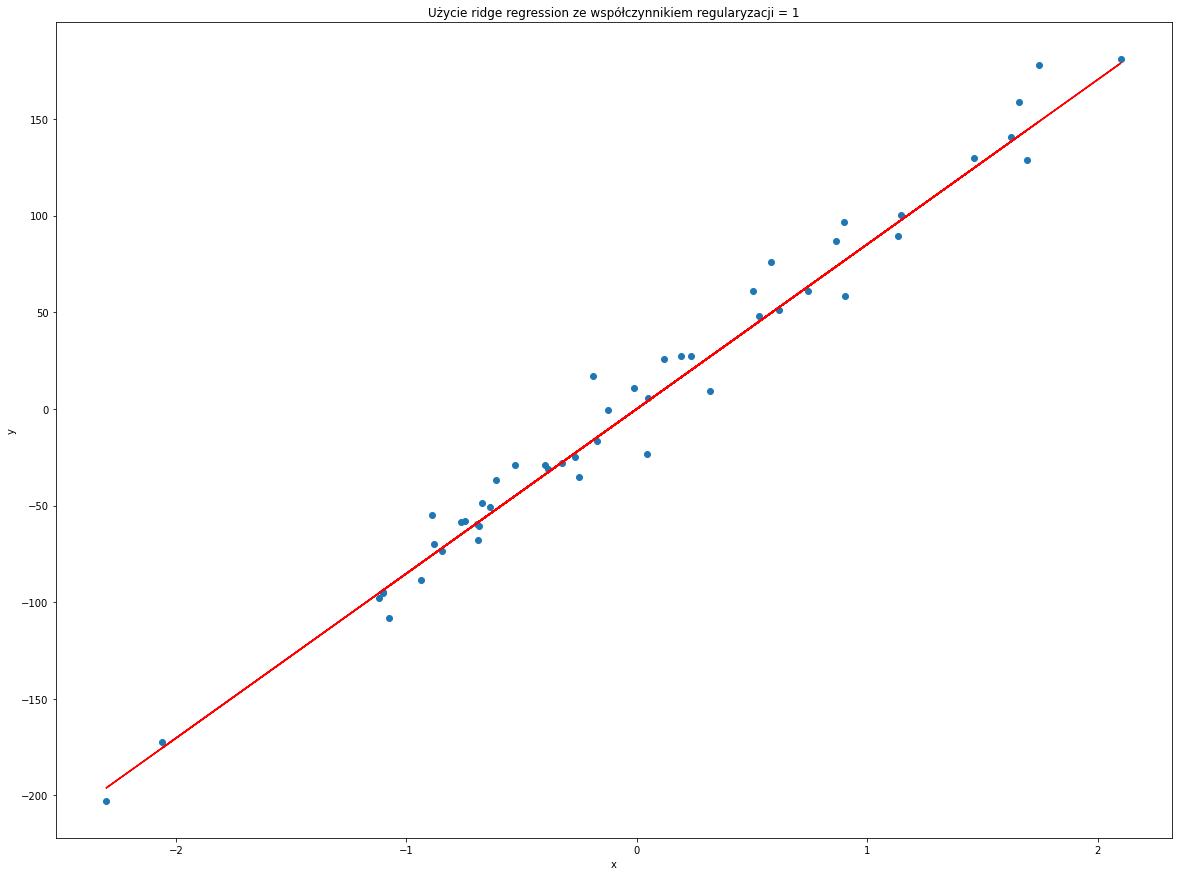

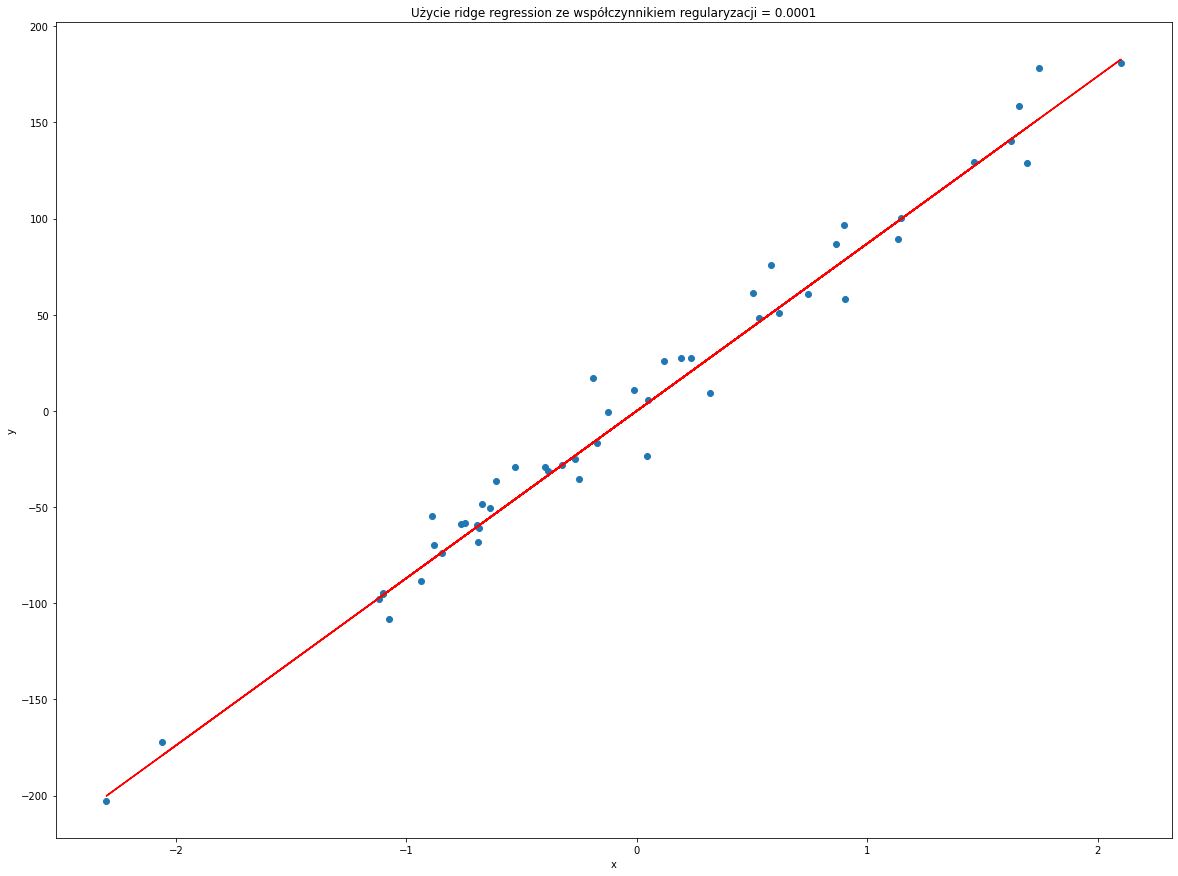

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

# Tworzenie przykładowych danych dla regresji

X, y, coefficients = make_regression(
    n_samples=50,    # Liczba próbek
    n_features=1,     # Liczba cech (dane wejściowe)
    n_informative=1,  # Liczba cechy do zbudowania modelu liniowego
    n_targets=1,      # Liczba wymiarów wartości wzorcowej
    noise=15,         # Siła odchylenia
    coef=True,        # Zwraca parametry modelu liniowego
    random_state=1    # Stan początkowy do losowania danych
)

# Współczynniki regularyzacji (na wykładach jako lambda)

alphas = [10000, 1000, 100, 10, 1, 0.0001]

for a in alphas:
  ridge = Ridge(alpha=a, fit_intercept=False)
  ridge.fit(X, y)
  w = ridge.coef_

  ax = plt.gca()
  ax.scatter(X, y)
  ax.plot(X, w*X, c='red')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"Użycie ridge regression ze współczynnikiem regularyzacji = {a}")
  
  plt.show()
  print("\n")







###Klasyfikacja
Klasyfikacja polega na przypisaniu danych do wcześniej zdefiniowanych klas.
Istnieją dwa typy klasyfikacji:

- Klasyfikacja binarna:  
W jej przypadku sortujemy dane na podstawie dwoch dyskretnych (nieciągłych) wartości. Może to być na przykład sortowanie pacjentów, którzy cierpią na konkretną chorobę lub nie.
- Klasyfikacja wieloklasowa:  
W jej przypadku sortujemy dane względem trzech lub więcej klas. Możemy na przykład na podstawie zdjęć zapisanych pismem ręcznym cyfr przydzielać je do klas ze zbioru {0, 1, 2, ..., 8, 9}

Biblioteka scikit-learn zapewnia wiele różnych algorytmów klasyfikacji. Poniżej przedstawimy przykład klasyfikacji binarnej z wykorzystaniem SVM - metody wektorów nośnych (Support Vector Machines).

W przypadku danych, które możemy podzielić liniowo na dwa zbiory zazwyczaj algorytm klasyfikacji próbuje znaleźć granicę pomiędzy zbiorami, tak by zminimalizować błąd niepoprawnej klasyfikacji. 


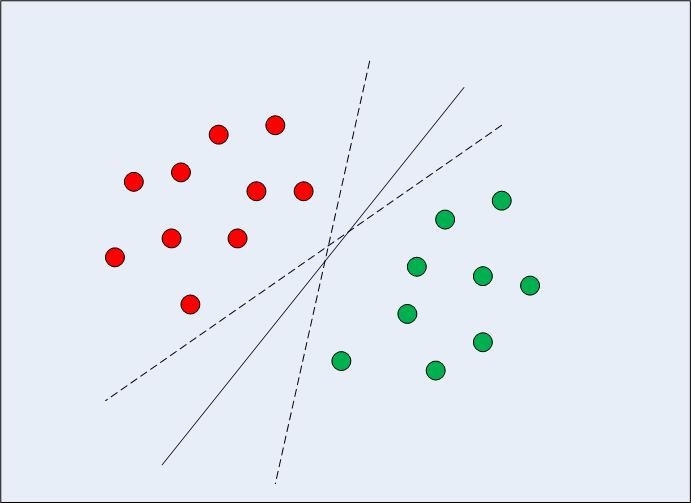

W powyższym przykładzie każda z lini będzie prawidłowa. Tym co jednak odróżnia metodę wektorow nośnych jest to, że wybiera onę granicę w taki sposób, by jak najbardziej zwiększyć odległośc punktów od niej z obydwu zbiorów. Nie tylko znajduje więc ona granicę, ale także znajduje najoptymalniejszą granicę decyzyjną.

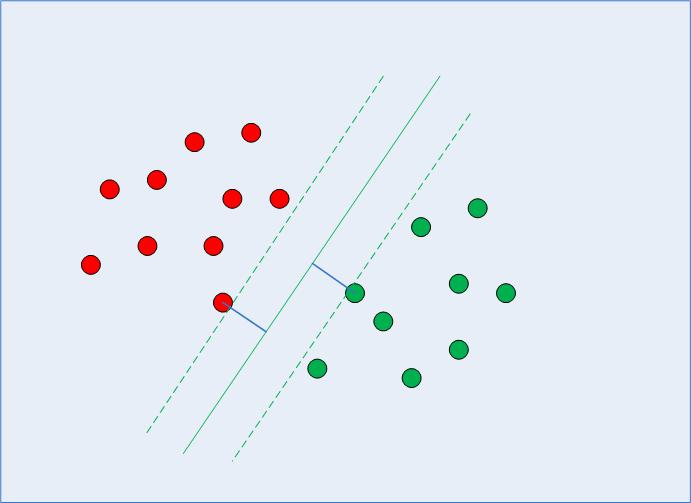

### Przykład implementacji klasyfikacji przy pomocy metody wektorów nośnych w scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('./diabetes.csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = data.drop("Outcome", axis=1)
y=np.ravel(data['Outcome'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=50)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_predict = svc_model.predict(x_test)

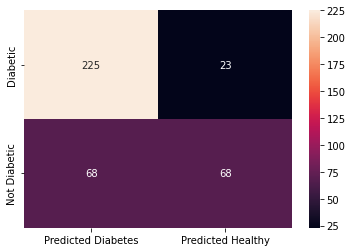

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])
sns.heatmap(confusion,annot=True,fmt='g')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       248
           1       0.75      0.50      0.60       136

    accuracy                           0.76       384
   macro avg       0.76      0.70      0.72       384
weighted avg       0.76      0.76      0.75       384



### Klasteryzacja

Lub inaczej analiza skupisk polega na grupowaniu zbioru danych. Może być określone jako przypisywanie obietków do klastrów zawierających inne podobne obiekty. Zalicza się do uczenia nienadzorowanego.

Można wyróżnić kilka typów klasteryzacji:

- Klasteryzowanie partycjonowane (Partitioning Clustering) - dzielenie danych na grupy niehierarchiczne. Popularnym przykładem tego typu klasteryzacji jest algorytm K-Średnich (K-Means Clustering Algorithm), któremu będziemy bliżej przedstawiać później.

- Klasteryzacja oprarta o gęstość zbioru (Density-Based Clustering) - metoda polegająca na klastrowaniu obszarów o zwiększonej gęstości.


- Model podziału danych (Distribution Model-Based Clustering) - dane są dzielone w oparciu o to z jakim prawdopodobieństwem należą do danej grupy.


- Klasteryzacja hierarchiczna (Hierarchical Clustering) - obiekty najbardziej do siebie podobne łączyny w coraz większe grupy tworząc w ten sposób strukturę drzewiastą.


- Rozmyta analiza skupień (Fuzzy Clustering) - obiekt może należeć do więcej niż jednej grupy.



### Algorytm K-Means jako przykład klasteryzacji

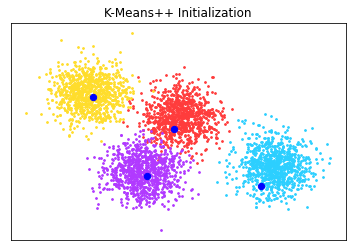

In [ ]:
# Imports
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
colors = ["#FF3C3C", "#FFDD2C", "#B13AFF", "#2CCFFF"]
points = 3700
groups = 4

# Generate clusters
x, y = make_blobs(n_samples=points, centers=groups, cluster_std=0.70, random_state=0)
x = x[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(x, n_clusters=groups, random_state=0)

# Plot init seeds along side sample data
plt.figure(1)

for k, col in enumerate(colors):
    cluster_data = y == k
    plt.scatter(x[cluster_data, 0], x[cluster_data, 1], c=col, marker=".", s=12)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=40)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

### Dimensionality Reduction

In [ ]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.datasets import fetch_california_housing, load_breast_cancer


##### Read Data

In [ ]:
data=load_breast_cancer()
df_x = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target)[0]

In [ ]:
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Logistic Regression (baseline)

In [ ]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train,y_train)
print(f'linear regression score for all dimensions {reg.score(x_test,y_test)}')

linear regression score for all dimensions 0.7127547318935823


#### PCA (Principal Component Analysis)

PCA as an unsupervised linear dimensionality reduction technique that helps us identify patterns in data based of the correlation between the features. 

PCA aims to find the directions of the maximum variance in high dimensional data and project it onto a lower dimensional feature space.

In [ ]:
for i in range(29,1,-2):
    pca = PCA(n_components=i, whiten='True')
    x = pca.fit(df_x).transform(df_x)
    x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
    reg.fit(x_train,y_train)
    print(f'linear regression score for {i} dimensions {reg.score(x_test,y_test)} using PCA reduction')

linear regression score for 29 dimensions 0.7266671937156037 using PCA reduction
linear regression score for 27 dimensions 0.728183146403347 using PCA reduction
linear regression score for 25 dimensions 0.7320655666561274 using PCA reduction
linear regression score for 23 dimensions 0.7325394328901649 using PCA reduction
linear regression score for 21 dimensions 0.728581650732001 using PCA reduction
linear regression score for 19 dimensions 0.7142000012922707 using PCA reduction
linear regression score for 17 dimensions 0.7131721029950768 using PCA reduction
linear regression score for 15 dimensions 0.6742572956296833 using PCA reduction
linear regression score for 13 dimensions 0.6709125889825868 using PCA reduction
linear regression score for 11 dimensions 0.6764546285268969 using PCA reduction
linear regression score for 9 dimensions 0.5896149827957449 using PCA reduction
linear regression score for 7 dimensions 0.6074884368292808 using PCA reduction
linear regression score for 5 di

#### Correlation Matrix

In [ ]:
df_x.corr().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


#### SVD (Singular Value Decomposition)

SVD is also a linear dimensionality reduction technique.

Very similar to PCA, but it doesn't center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In practice TruncatedSVD is useful on large sparse datasets which cannot be centered without exploding the memory usage.

In [ ]:
for i in range(29,1,-2):
    svd = TruncatedSVD(n_components=i)
    x = svd.fit(df_x).transform(df_x)
    x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
    reg.fit(x_train,y_train)
    print(f'linear regression score for {i} dimensions {reg.score(x_test,y_test)} using TruncatedSVD reduction')

linear regression score for 29 dimensions 0.7267125658918419 using TruncatedSVD reduction
linear regression score for 27 dimensions 0.730597389634817 using TruncatedSVD reduction
linear regression score for 25 dimensions 0.7322457753040241 using TruncatedSVD reduction
linear regression score for 23 dimensions 0.7325232221737593 using TruncatedSVD reduction
linear regression score for 21 dimensions 0.7276102608363191 using TruncatedSVD reduction
linear regression score for 19 dimensions 0.7123483373646593 using TruncatedSVD reduction
linear regression score for 17 dimensions 0.6993752586016705 using TruncatedSVD reduction
linear regression score for 15 dimensions 0.6744013619844916 using TruncatedSVD reduction
linear regression score for 13 dimensions 0.6736031806773157 using TruncatedSVD reduction
linear regression score for 11 dimensions 0.6775287953624818 using TruncatedSVD reduction
linear regression score for 9 dimensions 0.5902849755218539 using TruncatedSVD reduction
linear regre

#### PCA with Random Forest Classification 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.9122807017543859

In [ ]:
pca = PCA(n_components=5, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.9210526315789473

In [ ]:
pca = PCA(n_components=2, whiten='True')
x = pca.fit(df_x).transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.868421052631579

#### Dimension Separation
Plot bellow shows how separated are data points when reduced to only 2 dimensions

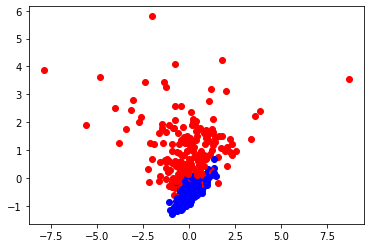

In [ ]:
y = df_y.values
for i in range(569):
    if y[i]==0:
        plt.scatter(x[i,1],x[i,0],c='r')
    else:
        plt.scatter(x[i,1],x[i,0],c='b')
plt.show()


### Porównanie modeli uczenia maszynowego

- Jak wybrać **którego modelu użyć** do nadzorowanego zadania uczenia się?
- Jak wybrać **najlepsze parametry tuningu** dla tego modelu?
- Jak oszacować **prawdopodobną wydajność mojego modelu** na danych poza próbką?

#### Podejście #1: Trenuj i testuj na całym zbiorze danych

1. Trenujemy model na **całym zbiorze danych**.
2. Test modelu na **tym samym zbiorze danych** i ocena, jak dobrze sobie poradziliśmy, porównując **przewidywane** wartości odpowiedzi z **prawdziwymi** wartościami odpowiedzi.

In [ ]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Regresja logistyczna

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Dokładność klasyfikacji:

- **Proporcja** poprawnych prognoz
- Powszechna **miara oceny** problemów z klasyfikacją

In [ ]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


KNN (K=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


KNN (K=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0



#### Problemy z trenowaniem i testowaniem na tych samych danych

- Celem jest oszacowanie prawdopodobnej wydajności modelu na **danych poza próbą**
- Ale maksymalizacja dokładności treningu nagradza **zbyt złożone modele**, które niekoniecznie będą uogólniać
- Niepotrzebnie skomplikowane modele **nadmiernie dopasowują** dane treningowe


![Overfitting](images/05_overfitting.png)

Image: [Overfitting](https://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg)

#### Podejście #2: Podział na zestwy treningowy/testowy
1. Podziel zbiór danych na dwie części: **zestaw szkoleniowy** i **zestaw testowy**.
2. Trenuj model na **zestawie treningowym**.
3. Przetestuj model na **zestawie testowym** i oceń, jak dobrze nam poszło.

In [ ]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

(150, 4)
(150,)


Co to dało?

- Model można trenować i testować na **różnych danych**
- Wartości odpowiedzi są znane dla zestawu testowego, dzięki czemu **przewidywania mogą być oceniane**
- **Dokładność testowania** jest lepszym oszacowaniem niż dokładność treningu wyników poza próbą

In [ ]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

(90, 4)
(60, 4)
(90,)
(60,)
0.9333333333333333



Powtórz dla KNN z K=5:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667



Powtórz dla KNN z K=1:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Czy możemy znaleźć jeszcze lepszą wartość K?

Text(0, 0.5, 'Testing Accuracy')

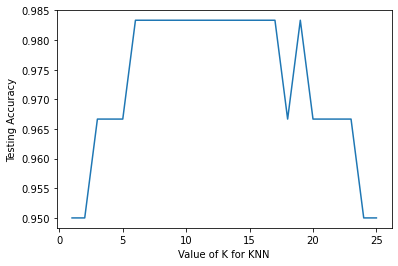

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- **Dokładność treningu** rośnie wraz ze wzrostem złożoności modelu
- **Dokładność testowania** karze modele, które są zbyt złożone lub niewystarczająco złożone
- W przypadku modeli KNN złożoność jest określona przez **wartość K** (niższa wartość = bardziej złożona)

#### Zalety podziału na dwa zbiory?

- Zapewnia **oszacowanie wysokiej wariancji** dokładności poza próbą
- Dopasowanie złożoności dzięki **K-krotnej weryfikacji krzyżowej** 
- Podział na zbiór treningowy i testowy jest przydatny ze względu na jego **elastyczność i prędkość**

## Preprocessing: standaryzacja danych

Standaryzacja polega na przeskalowaniu danych pierwotnych tak, aby ich rozkład miał średnią wartość równą 0 i odchylenie standardowe równe 1. Standaryzacja danych jest ważnym etapem przetwarzania wstępnego dla wielu algorytmów uczenia maszynowego.

Przykład standaryzacji


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


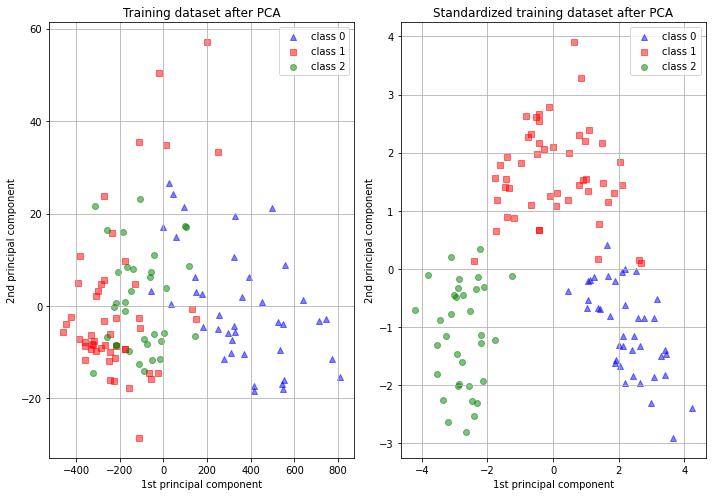

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

## Źródła:

- https://scikit-learn.org
- https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
- https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/
- https://www.bmc.com/blogs/scikit-learn-classification-tutorial/
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
- https://www.javatpoint.com/clustering-in-machine-learning
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py